learn to implement transfer learning using a pre-trained model in Keras.

#### Learning objectives

By the end of this lab, you will:

 - Import necessary libraries and load the dataset.
 - Load a pre-trained model, VGG16, excluding the top layers.
 - Add new layers on top of the base model and compile the model.
 - Train the model on the new dataset.
 - Unfreeze some of the layers of the pre-trained model and fine-tune them.

Step-by-Step Guide:
Step 1: Setup the Environment
Before we start, make sure to import the required libraries: TensorFlow and Keras. Keras is included within TensorFlow as tensorflow.keras.

In [1]:
from keras.api.applications import VGG16
from keras.api.models import Sequential
from keras.api.layers import Dense, Flatten
# Explanation:
# tensorflow is the main library for machine learning in Python.
# Sequential is used to create a model with a linear stack of layers.
# Dense and Flatten are types of layers that we will use in our model.

In [2]:
# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [7]:
#### Step 3: Create and Compile the Model 
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

# Compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [3]:
# Create Placeholder Images
import os
from PIL import Image
import numpy as np

# Create directories if they don't exist
os.makedirs('sample_data/class_a', exist_ok = True)
os.makedirs('sample_data/class_b', exist_ok = True)

# Create 10 sample images for each class
for i in range(10):
    # Create a blank white image for class_a
    # Return a new array of given shape and type, filled with ones.
    img = Image.fromarray(np.ones((224, 224, 3), dtype = np.uint8) * 255)
    img.save(f'sample_data/class_a/img_{i}.jpg')

    # Create a blank black image for class_b
    # @overload
    # def zeros(
    #     shape: _ShapeLike,
    #     dtype: None = ...,
    #     order: _OrderCF = ...,
    #     *,
    #     device: None | L["cpu"] = ...,
    #     like: None | _SupportsArrayFunc = ...,
    # ) -> NDArray[float64]: ...
    # @overload
    # def zeros(
    #     shape: _ShapeLike,
    #     dtype: _DTypeLike[_SCT],
    #     order: _OrderCF = ...,
    #     *,
    #     device: None | L["cpu"] = ...,
    #     like: None | _SupportsArrayFunc = ...,
    # ) -> NDArray[_SCT]: ...
    # @overload
    # def zeros(
    #     shape: _ShapeLike,
    #     dtype: DTypeLike,
    #     order: _OrderCF = ...,
    #     *,
    #     device: None | L["cpu"] = ...,
    #     like: None | _SupportsArrayFunc = ...,
    # ) -> NDArray[Any]: ...
    # has been overloaded
    img = Image.fromarray(np.zeros((224, 224, 3), dtype = np.uint8))
    img.save(f'sample_data/class_b/img_{i}.jpg')

print("Sample images created in 'sample_data/'")

Sample images created in 'sample_data/'


In [9]:
# Step 4: Train the Model¶
# Load the preprocess the dataset
import tensorflow as tf
import keras
def load_and_preprocess_image(file_path):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image, channels = 3)
    image = tf.image.resize(image, [224, 224])
    image = image / 255.0 # Rescale the image
    return image

# Define the function to load the dataset
def load_dataset(directory):
    file_paths = []
    labels = []
    class_names = sorted(os.listdir(directory))
    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(directory, class_name)
        for file_name in os.listdir(class_dir):
            file_paths.append(os.path.join(class_dir, file_name))
            labels.append(label)
    return file_paths, labels, class_names

# Load the dataset
directory = 'sample_data'
file_paths, labels, class_names = load_dataset(directory)

# Create a tf.data.Dataset object
dataset = tf.data.Dataset.from_tensor_slices((file_paths, labels))
dataset = dataset.map(lambda x, y: (load_and_preprocess_image(x), y), num_parallel_calls = tf.data.AUTOTUNE)
dataset = dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Split the dataset into training and validation sets
train_size = int(0.8 * len(file_paths))
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)

# Verify if the dataset has loaded images correctly
print(f"Found {len(file_paths)} images belonging to {len(class_names)} classes.")

# Define a simple model for demonstration purposes
model = Sequential([
    keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (224, 224, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the model
if len(file_paths) > 0:
    model.fit(train_dataset, validation_data=val_dataset, epochs=10)


Found 20 images belonging to 2 classes.
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.5000 - loss: 0.6818
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5000 - loss: 0.4138
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.5000 - loss: 0.3712
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 1.0000 - loss: 0.3459
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 1.0000 - loss: 0.3451
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 1.0000 - loss: 0.3447
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 1.0000 - loss: 0.3442
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 1.0000 - loss: 0.3437
Epoch 9/10


2025-03-13 22:33:37.226664: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 1.0000 - loss: 0.3433
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 1.0000 - loss: 0.3428


GitHub Copilot
Since ImageDataGenerator is deprecated, we will use tf.data to load and preprocess the dataset. Here's how you can achieve the same functionality using tf.data:

Load and preprocess the dataset.
Create a tf.data.Dataset object.
Train the model.
Here's the updated code:

1 vulnerability
In this code:

The load_and_preprocess_image function loads and preprocesses the images by reading the file, decoding the JPEG image, resizing it to the target size, and rescaling the pixel values.
The load_dataset function loads the dataset from the specified directory and returns the file paths, labels, and class names.
The tf.data.Dataset object is created from the file paths and labels, and the images are loaded and preprocessed using the load_and_preprocess_image function.
The dataset is split into training and validation sets.
A simple model is defined, compiled, and trained using the training and validation datasets.
Similar code found with 2 license types - View matches
whiteknight0x00
whats the meaning of channels = 3?

GitHub Copilot
In the context of image processing, the term "channels" refers to the different color components that make up an image. Each channel represents a specific color in the image. The most common color channels are:

1 channel: Grayscale image (only intensity values, no color information).
3 channels: RGB image (Red, Green, and Blue channels).
4 channels: RGBA image (Red, Green, Blue, and Alpha channels, where Alpha represents transparency).
When you see channels=3, it means that the image has three color channels, which typically correspond to the RGB color model. Each pixel in the image is represented by three values: one for the red component, one for the green component, and one for the blue component.

For example, in the following code snippet from your active file, the decode_jpeg function is used to decode a JPEG image, and the channels parameter specifies the number of color channels in the output image:

In [10]:
# decode_jpeg = tf_export(
#     'io.decode_jpeg',
#     'image.decode_jpeg',
#     v1=['io.decode_jpeg', 'image.decode_jpeg'])(
#         dispatch.add_dispatch_support(gen_image_ops.decode_jpeg))

If you set channels=3, the decoded image will have three color channels (RGB). If you set channels=1, the decoded image will be a grayscale image with only one channel.

#### Exercise 1: Visualize Training and Validation Loss

**Objective:** Plot the training and validation loss to observe the learning process of the model.

**Instructions:**
1. Modify the training code to include validation data.
2. Plot the training and validation loss for each epoch.

16
20


/Users/whiteknight/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step - accuracy: 0.0000e+00 - loss: 0.7963
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5000 - loss: 0.4456
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.5000 - loss: 0.3844
Epoch 4/10


2025-03-13 22:46:59.212360: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/whiteknight/.local/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5000 - loss: 0.3467
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 1.0000 - loss: 0.3458
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 1.0000 - loss: 0.3454
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 1.0000 - loss: 0.3450
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 1.0000 - loss: 0.3446
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 1.0000 - loss: 0.3442
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 1.0000 - loss: 0.3438
{'accuracy': [0.0, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'loss': [0.7962669134140015, 0.4455734193325043, 0.3843790292739868, 0.3467053771018982, 0.3458406329154968, 0.34543171525001526, 0.3450325131416321, 0.34462469816207886, 0.34420984983444214, 0.3437888026237488]}


KeyError: 'val_loss'

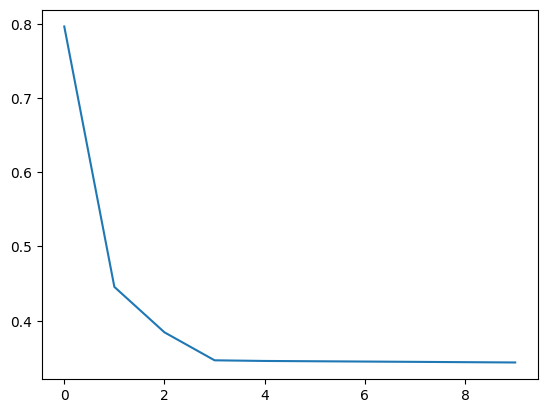

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
def load_and_preprocess_image(file_path):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image, channels = 3)
    image = tf.image.resize(image, [224, 224])
    image = image / 255.0 # Rescale the image
    return image

# Define the function to load the dataset
def load_dataset(directory):
    file_paths = []
    labels = []
    class_names = sorted(os.listdir(directory))
    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(directory, class_name)
        for file_name in os.listdir(class_dir):
            file_paths.append(os.path.join(class_dir, file_name))
            labels.append(label)
    return file_paths, labels, class_names

# Load the dataset
directory = 'sample_data'
file_paths, labels, class_names = load_dataset(directory)

# Create a tf.data.Dataset object
dataset = tf.data.Dataset.from_tensor_slices((file_paths, labels))
dataset = dataset.map(lambda x, y: (load_and_preprocess_image(x), y), num_parallel_calls = tf.data.AUTOTUNE)
dataset = dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Split the dataset into training and validation sets
train_size = int(0.8 * len(file_paths))
print(train_size)
print(len(file_paths))
val_size = len(file_paths) - train_size
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size).take(val_size)

for i in val_dataset:
    print(f"val_dataset:{i}\n")


# Ensure that the validation dataset is not empty
if val_size == 0:
    raise ValueError("Validation dataset is empty. Please ensure there are enough samples to create a validation set.")

# Define a simple model for demonstration purposes
model = Sequential([
    keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (224, 224, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# TODO: So there is an error in the code, which I am not able to figure out.
# The error is: KeyError: 'val_loss'
# I am not for sure if the error is caused by the pre-trained model.
# I think the error is caused is caused by empty validation dataset, So I will figure it out tomorrow.
# End of the day.
# Date: 13/03/2025 10:50 PM
history = model.fit(train_dataset, validation_data = val_dataset, epochs=10)


print(history.history)
# Plot training and validation loss
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()